<a href="https://colab.research.google.com/github/pawel-wyszomirski/colab-python/blob/main/szcz%C4%99%C5%9Bcie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://chatgpt.com/c/6707071e-6d7c-8003-90f8-f0ae3fc98f69

# Instalacja MLcroissant

In [1]:
!pip install mlcroissant


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.8 MB/s eta 0:00:00
  Created wheel for jsonpath-rw: filename=jsonpath_rw-1.4.0-py3-none-any.whl size=15128 sha256=fe7a2c7d7074e24b6b2d98fb3bc7536ed5d25c56cb07db1ae5d1cbd27349b0f6
  Stored in directory: /root/.cache/pip/wheels/e3/76/6f/c25be6a9e6cc9985b96e8c95997d46790242c6426ef68e754c
Successfully built jsonpath-rw


# Import danych

In [2]:
import requests
import zipfile
import io
import pandas as pd

# URL do pliku ZIP
url = "https://www.kaggle.com/api/v1/datasets/download/jainaru/world-happiness-report-2024-yearly-updated?datasetVersionNumber=1"

# Pobierz plik ZIP
response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))

# Wylistuj zawartość ZIP
print("Zawartość archiwum ZIP:")
print(zip_file.namelist())

# Wczytaj plik CSV bezpośrednio z ZIP
with zip_file.open('World-happiness-report-2024.csv') as file:
    df = pd.read_csv(file)

# Wyświetl pierwsze kilka wierszy danych
df.head()


Zawartość archiwum ZIP:
['World-happiness-report-2024.csv', 'World-happiness-report-updated_2024.csv']


,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


# Sprawdzenie poprawności danych

In [3]:
# Wyświetl podstawowe informacje o danych
df.info()

# Statystyki opisowe (średnia, min, max, percentyle itp.)
df.describe()

# Sprawdzanie brakujących wartości
missing_values = df.isnull().sum()
print("Liczba brakujących wartości w poszczególnych kolumnach:")
print(missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.5+ KB
Liczba brakując

In [5]:
# Wybierz kolumny do analizy korelacji
kolumny_do_korelacji = ['Ladder score', 'Log GDP per capita', 'Social support',
                        'Healthy life expectancy', 'Freedom to make life choices',
                        'Generosity', 'Perceptions of corruption']

# Obliczanie macierzy korelacji
korelacja = df[kolumny_do_korelacji].corr()

# Wyświetlanie macierzy korelacji
print(korelacja)


                              Ladder score  Log GDP per capita  \
Ladder score                      1.000000            0.768504   
Log GDP per capita                0.768504            1.000000   
Social support                    0.813542            0.726843   
Healthy life expectancy           0.759659            0.830256   
Freedom to make life choices      0.644451            0.414886   
Generosity                        0.130038           -0.059405   
Perceptions of corruption         0.451829            0.444227   

                              Social support  Healthy life expectancy  \
Ladder score                        0.813542                 0.759659   
Log GDP per capita                  0.726843                 0.830256   
Social support                      1.000000                 0.706924   
Healthy life expectancy             0.706924                 1.000000   
Freedom to make life choices        0.484641                 0.401082   
Generosity                       

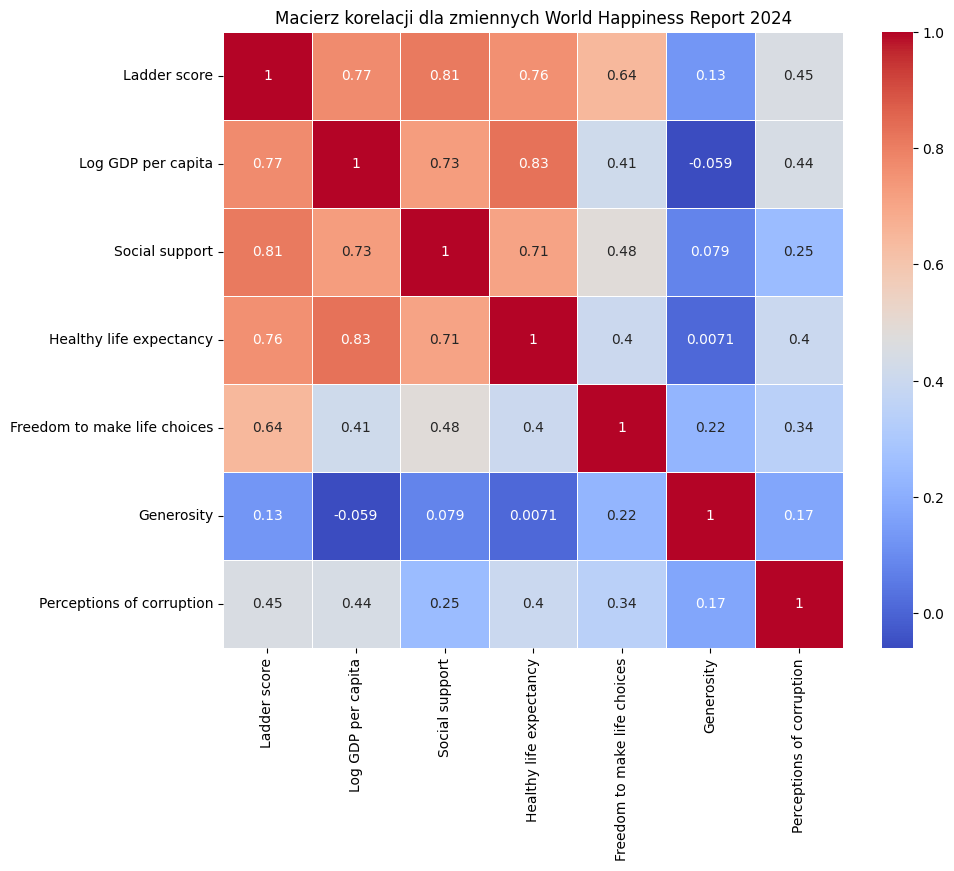

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Wykres heatmap dla macierzy korelacji
plt.figure(figsize=(10, 8))
sns.heatmap(korelacja, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Macierz korelacji dla zmiennych World Happiness Report 2024")
plt.show()


Regional indicator
South Asia                            3.895667
Sub-Saharan Africa                    4.329686
Middle East and North Africa          5.199941
Commonwealth of Independent States    5.538500
Southeast Asia                        5.551889
East Asia                             5.934333
Latin America and Caribbean           6.143368
Central and Eastern Europe            6.170941
Western Europe                        6.841650
North America and ANZ                 6.927750
Name: Ladder score, dtype: float64


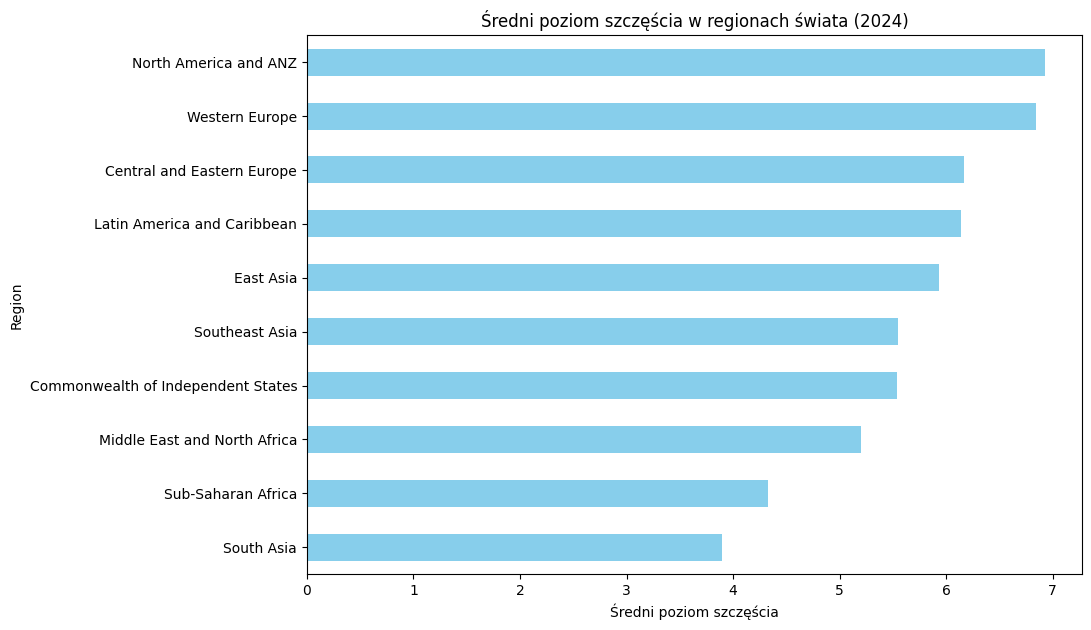

In [ ]:
# Grupowanie według regionów i obliczanie średniego poziomu szczęścia
srednie_szczescie_regiony = df.groupby('Regional indicator')['Ladder score'].mean().sort_values()

# Wyświetlanie wyników
print(srednie_szczescie_regiony)

# Wykres średniego poziomu szczęścia dla regionów
srednie_szczescie_regiony.plot(kind='barh', figsize=(10, 7), color='skyblue')
plt.title("Średni poziom szczęścia w regionach świata (2024)")
plt.xlabel("Średni poziom szczęścia")
plt.ylabel("Region")
plt.show()


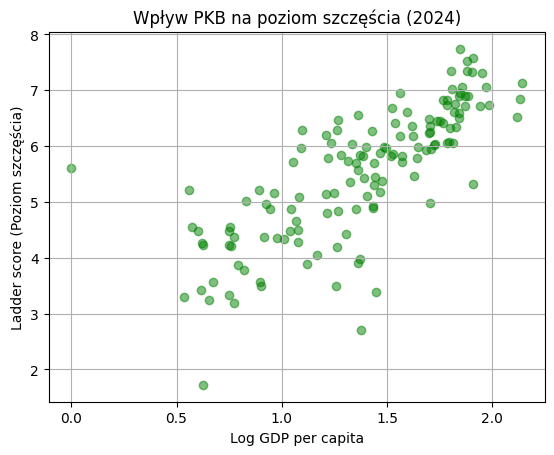

In [ ]:
# Wykres punktowy: PKB na mieszkańca vs Poziom szczęścia
plt.scatter(df['Log GDP per capita'], df['Ladder score'], alpha=0.5, color='green')
plt.title("Wpływ PKB na poziom szczęścia (2024)")
plt.xlabel("Log GDP per capita")
plt.ylabel("Ladder score (Poziom szczęścia)")
plt.grid(True)
plt.show()


In [7]:
# Ranking krajów według poziomu szczęścia
ranking_szczescia = df[['Country name', 'Ladder score']].sort_values(by='Ladder score', ascending=False)

# Wyświetl pierwsze 10 najszczęśliwszych krajów
print("10 najszczęśliwszych krajów:")
print(ranking_szczescia.head(10))

# Wyświetl 10 najmniej szczęśliwych krajów
print("10 najmniej szczęśliwych krajów:")
print(ranking_szczescia.tail(10))


10 najszczęśliwszych krajów:
  Country name  Ladder score
0      Finland         7.741
1      Denmark         7.583
2      Iceland         7.525
3       Sweden         7.344
4       Israel         7.341
5  Netherlands         7.319
6       Norway         7.302
7   Luxembourg         7.122
8  Switzerland         7.060
9    Australia         7.057
10 najmniej szczęśliwych krajów:
         Country name  Ladder score
134          Eswatini         3.502
133            Zambia         3.502
135            Malawi         3.421
136          Botswana         3.383
137          Zimbabwe         3.341
138  Congo (Kinshasa)         3.295
139      Sierra Leone         3.245
140           Lesotho         3.186
141           Lebanon         2.707
142       Afghanistan         1.721


In [8]:
!pip install geopandas plotly
!pip install pycountry


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 41.6 MB/s eta 0:00:00


In [9]:
import pandas as pd
import pycountry

# Zamiana nazw krajów na kody Alpha-3
def get_country_code(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except LookupError:
        return None

# Dodanie kolumny z kodami krajów
df['country_code'] = df['Country name'].apply(get_country_code)

# Sprawdzenie, czy jakieś kraje nie zostały poprawnie zmapowane
print(df[df['country_code'].isnull()])


                  Country name                  Regional indicator  \
28                      Kosovo          Central and Eastern Europe   
30    Taiwan Province of China                           East Asia   
71                      Russia  Commonwealth of Independent States   
85   Hong Kong S.A.R. of China                           East Asia   
88         Congo (Brazzaville)                  Sub-Saharan Africa   
95                 Ivory Coast                  Sub-Saharan Africa   
97                     Turkiye        Middle East and North Africa   
102         State of Palestine        Middle East and North Africa   
138           Congo (Kinshasa)                  Sub-Saharan Africa   

     Ladder score  upperwhisker  lowerwhisker  Log GDP per capita  \
28          6.561         6.667         6.455               1.364   
30          6.503         6.597         6.410               1.842   
71          5.785         5.859         5.712               1.642   
85          5.316      

In [10]:
import plotly.express as px

# Tworzenie mapy świata z poziomem szczęścia
fig = px.choropleth(df,
                    locations="country_code",  # Kolumna z kodami Alpha-3
                    color="Ladder score",  # Kolumna z poziomem szczęścia
                    hover_name="Country name",  # Nazwy krajów do wyświetlania na mapie
                    color_continuous_scale=px.colors.sequential.Plasma,  # Skala kolorów
                    title="World Happiness Report 2024")

# Wyświetlenie mapy
fig.show()


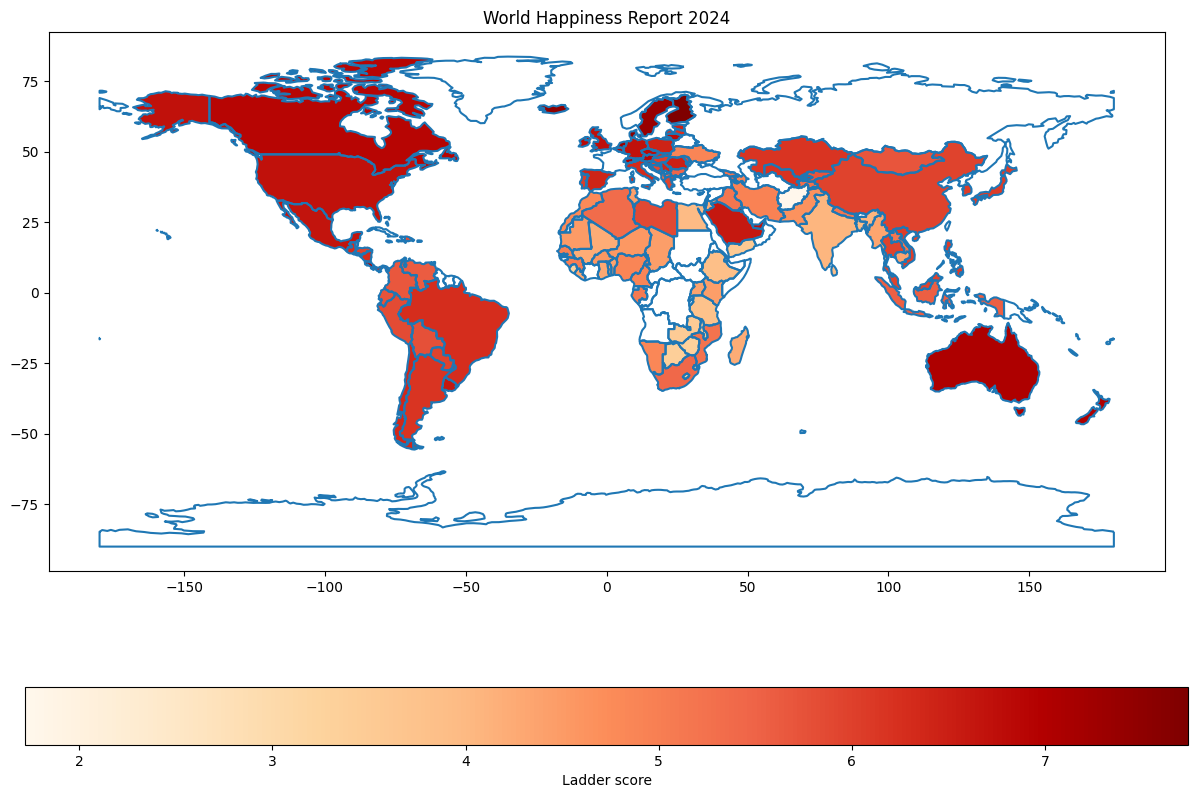

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os

# Download the Natural Earth low-resolution world map data if it doesn't exist:
if not os.path.exists("ne_110m_admin_0_countries.shp"):
    !wget https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
    !unzip ne_110m_admin_0_countries.zip

# Set the SHAPE_RESTORE_SHX config option
os.environ['SHAPE_RESTORE_SHX'] = 'YES'

# Load the world map data using the downloaded file:
world = gpd.read_file("ne_110m_admin_0_countries.shp") # Update with correct path if needed


# Połącz dane o szczęściu z danymi geograficznymi
world = world.merge(df, how="left", left_on="ISO_A3", right_on="country_code")

# Stwórz mapę
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='Ladder score', ax=ax, legend=True,
           cmap='OrRd', legend_kwds={'label': "Ladder score",
                                     'orientation': "horizontal"})

plt.title("World Happiness Report 2024")
plt.show()

# Prognozowanie: regresja liniowa i random forest

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# Wybieramy cechy (features) i cel (target)
X = df[['Log GDP per capita', 'Social support', 'Healthy life expectancy',
        'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y = df['Ladder score']  # Poziom szczęścia jako zmienna celu

# Utworzenie obiektu SimpleImputer do wypełnienia brakujących wartości średnią
imputer = SimpleImputer(strategy='mean')

# Dopasowanie imputera do danych treningowych i transformacja X
X = imputer.fit_transform(X)

# Podział danych na zestaw treningowy i testowy po imputacji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Krok 1: Model regresji liniowej
model = LinearRegression()

# Trenowanie modelu na danych treningowych
model.fit(X_train, y_train)

# Predykcja na zestawie testowym
y_pred = model.predict(X_test)

# Ocena modelu
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Regresja Liniowa - MSE: {mse}, R^2: {r2}')

# Krok 2: Model Random Forest (regresja lasu losowego)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Trenowanie modelu
rf_model.fit(X_train, y_train)

# Predykcja na zestawie testowym
y_pred_rf = rf_model.predict(X_test)

# Ocena modelu
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - MSE: {mse_rf}, R^2: {r2_rf}')

Regresja Liniowa - MSE: 0.19253472096592095, R^2: 0.8276273661852045
Random Forest - MSE: 0.2277931120937245, R^2: 0.7960612065217354


# **Regresja Liniowa**

**Czym jest?**

Regresja Liniowa to technika statystyczna, która szuka prostej linii opisującej związek między jedną zmienną a drugą. Na przykład, jeśli chcemy przewidzieć wynik testu na podstawie liczby godzin nauki, regresja liniowa próbuje znaleźć prostą, która najlepiej odda tę zależność.

**Jak działa?**

Tworzy równanie postaci:
𝑦
=
𝑎
𝑥
+
𝑏
y=ax+b

Gdzie:
* x to dane wejściowe (np. liczba godzin nauki),
* y to dane wyjściowe (np. wynik testu),
a to współczynnik określający, jak szybko zmienia się wynik testu w zależności od godzin nauki,
b to punkt początkowy, gdy godziny nauki wynoszą zero.
Regresja liniowa zakłada, że ta zależność jest liniowa – innymi słowy, gdy godziny nauki rosną, wynik testu zmienia się o stałą wartość.

Interpretacja wyników regresji liniowej:
MSE (Mean Squared Error): 0.1925 – Średni błąd kwadratowy. To miara błędu, jakiego model się dopuszcza. W skrócie, MSE mówi, o ile wyniki przewidywane przez model różnią się od rzeczywistych wyników (im mniejsza wartość, tym lepiej).

Interpretacja: MSE wynosi 0.1925, co oznacza, że przewidywania modelu są dość bliskie rzeczywistym wartościom. Model dobrze sobie radzi z przewidywaniem.
R²: 0.8276 – Współczynnik determinacji. R² mówi, jak dobrze model wyjaśnia zmienność danych. Wartość bliska 1 oznacza, że model bardzo dobrze dopasowuje się do danych.

Interpretacja: Wartość R² wynosi 0.8276, co oznacza, że 82,76% zmienności wyników testów jest wyjaśnione przez liczbę godzin nauki. To oznacza, że model dobrze przewiduje wynik, ale nie jest idealny – pozostałe 17,24% zależy od innych czynników, które model nie uwzględnia.
Random Forest (Las Losowy)
Czym jest?
Random Forest to bardziej złożona metoda. Składa się z wielu "drzew decyzyjnych" – to modele, które podejmują decyzje na podstawie danych wejściowych. Każde drzewo podejmuje własną decyzję (przewiduje wynik), a na końcu wszystkie drzewa głosują, żeby ustalić ostateczną odpowiedź.

Jak działa?
Wyobraź sobie, że każde drzewo "pyta" o inne cechy danych (np. jedne drzewa pytają o godziny nauki, inne o wiek ucznia, inne o poziom trudności testu). Na końcu zbieramy wszystkie wyniki i ustalamy ostateczne przewidywanie na podstawie tego, co powiedziały poszczególne drzewa. To pozwala Random Forest działać lepiej w sytuacjach, gdy dane są bardziej złożone.

Interpretacja wyników Random Forest:
MSE (Mean Squared Error): 0.2278 – Średni błąd kwadratowy dla modelu Random Forest jest nieco wyższy niż dla regresji liniowej, co oznacza, że model ma większy błąd w swoich przewidywaniach.

Interpretacja: MSE wynosi 0.2278, co wskazuje, że przewidywania modelu są nadal stosunkowo dobre, ale gorsze niż w przypadku regresji liniowej. Random Forest nie przewiduje tak dokładnie w tym przypadku.
R²: 0.7961 – To znaczy, że model wyjaśnia 79,61% zmienności w danych.

Interpretacja: Random Forest wyjaśnia nieco mniej zmienności niż regresja liniowa, bo jego R² jest niższe (79,61% w porównaniu do 82,76% w regresji liniowej). To oznacza, że jest trochę mniej skuteczny w przewidywaniu wyników testu na podstawie danych.
Porównanie metod
Dokładność:

Regresja liniowa ma mniejsze MSE, co oznacza, że lepiej przewiduje wyniki w tym konkretnym przypadku.
R² również jest wyższe dla regresji liniowej, co oznacza, że lepiej wyjaśnia związek między danymi.
Złożoność:

Regresja liniowa jest prostsza – działa dobrze, gdy dane mają prostą zależność.
Random Forest jest bardziej skomplikowany, ale w tym przypadku nie działa lepiej. Może jednak lepiej radzić sobie z bardziej złożonymi danymi w innych przypadkach.
Jak można używać tych metod?
Regresja Liniowa: Idealna, gdy dane pokazują prosty, liniowy związek. Na przykład, gdy zależy Ci na przewidywaniu czegoś, co zmienia się w miarę równomiernie, jak wpływ czasu nauki na wynik testu.

Random Forest: Przydatna, gdy masz do czynienia z bardziej skomplikowanymi danymi, gdzie zależności między zmiennymi są trudne do uchwycenia za pomocą jednej prostej linii. Może być lepsza do przewidywania cen domów, prognozowania pogody lub w sytuacjach, gdzie mamy wiele różnych zmiennych, które nie mają prostych zależności.

Wnioski
W Twoim przypadku, regresja liniowa działa lepiej niż Random Forest, bo ma niższy błąd i lepiej wyjaśnia dane. Regresja liniowa jest więc bardziej odpowiednią metodą do przewidywania w tej konkretnej sytuacji.

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Definicja hiperparametrów do przeszukiwania
param_grid = {
    'n_estimators': [100, 200, 300],        # Liczba drzew
    'max_depth': [10, 20, 30, None],        # Maksymalna głębokość drzew
    'min_samples_split': [2, 5, 10],        # Minimalna liczba próbek do podziału w węźle
    'min_samples_leaf': [1, 2, 4],          # Minimalna liczba próbek w liściu
    'bootstrap': [True, False]              # Czy używać bootstrapu
}

# Inicjalizacja modelu Random Forest
rf = RandomForestRegressor(random_state=42)

# Inicjalizacja GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Trenowanie GridSearchCV
grid_search.fit(X_train, y_train)

# Wyświetlanie najlepszych parametrów
print("Najlepsze parametry: ", grid_search.best_params_)

# Predykcja i ocena modelu
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Random Forest (GridSearchCV) - MSE: {mse}, R^2: {r2}')


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Najlepsze parametry:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest (GridSearchCV) - MSE: 0.2277931120937245, R^2: 0.7960612065217354


Metoda GridSearchCV może wydawać się skomplikowana, ale spróbuję wytłumaczyć ją tak, jakbyśmy rozmawiali o prostym przykładzie – na przykładzie dopasowywania idealnego przepisu na ciasto.

Wyobraź sobie, że chcesz zrobić najlepsze ciasto.
Masz różne składniki i różne sposoby ich użycia:

Mąka: możesz wybrać różne rodzaje (np. pszenna, żytnia).
Cukier: możesz użyć więcej lub mniej cukru.
Temperatura pieczenia: możesz piec w różnych temperaturach.
Czas pieczenia: możesz piec dłużej lub krócej.
Chcesz znaleźć najlepszą kombinację tych wszystkich rzeczy, aby uzyskać idealne ciasto. Nie wiesz, która kombinacja jest najlepsza, więc próbujesz różnych możliwości.

Czym jest GridSearchCV?
GridSearchCV to narzędzie, które pomaga znaleźć najlepsze ustawienia ("składniki") dla Twojego modelu, tak jakbyś próbował różnych przepisów na ciasto. Zamiast zgadywać, ile mąki i cukru użyć lub jak długo piec, GridSearchCV automatycznie sprawdza różne kombinacje ustawień, aby zobaczyć, który "przepis" działa najlepiej.

Jak to działa?
Lista składników (parametrów): Najpierw musisz przygotować listę rzeczy, które chcesz przetestować. Na przykład, dla ciasta to mogą być różne ilości cukru i mąki, a w przypadku modelu może to być liczba drzew (np. 50, 100, 200) lub maksymalna głębokość drzewa (np. 10, 20, 30). To są parametry modelu.

Wszystkie kombinacje: GridSearchCV przetestuje wszystkie możliwe kombinacje tych ustawień. Tak jakbyś piekł ciasto z każdą możliwą ilością cukru, mąki i w różnych temperaturach. Dla każdego zestawu parametrów sprawdza, jak dobrze działa model (lub jak smakuje ciasto).

Ocena: GridSearchCV ocenia każdą kombinację. Na przykład, sprawdza, jak dobrze model przewiduje wyniki (tak jakbyś oceniał, jak dobre jest ciasto).

Najlepszy przepis: Po przetestowaniu wszystkich możliwych kombinacji parametrów, GridSearchCV wybiera ten zestaw, który daje najlepszy wynik. To jak znalezienie najlepszego przepisu na ciasto po wypróbowaniu wielu różnych wersji.

Co to jest "CV" w GridSearchCV?
CV oznacza Cross-Validation (krzyżowa walidacja), czyli specjalna metoda testowania, która pozwala upewnić się, że model działa dobrze nie tylko na jednym zestawie danych, ale również na innych zestawach. To tak jakbyś testował ciasto w różnych warunkach, np. w różnych piekarnikach, żeby mieć pewność, że przepis zadziała wszędzie.

Prostym językiem:
GridSearchCV to jak robienie wielu prób, żeby znaleźć najlepszy sposób na zrobienie ciasta (czyli najlepsze parametry dla modelu).
Próbujesz różnych "składników" i sposobów pieczenia (różne ustawienia modelu).
Cross-Validation (CV) sprawdza, czy "przepis" działa dobrze na różnych danych (czyli nie tylko na jednym zestawie, ale też na innych).
Po co to wszystko?
Czasami model działa lepiej lub gorzej w zależności od ustawień parametrów (tak jak ciasto może być lepsze lub gorsze w zależności od ilości składników). GridSearchCV pozwala na automatyczne znalezienie tych najlepszych ustawień bez konieczności robienia wszystkiego ręcznie.

W skrócie: GridSearchCV pomaga Ci znaleźć najlepszy sposób na trenowanie modelu, testując różne ustawienia i wybierając ten, który działa najlepiej.

Zajmijmy się teraz szczegółową interpretacją wyników, które dotyczą Random Forest z użyciem metody GridSearchCV.

Co to oznacza?
Fitting 3 folds for each of 216 candidates, totalling 648 fits
To zdanie odnosi się do procesu strojenia hiperparametrów za pomocą metody GridSearchCV. Spróbujmy to rozbić na prostsze części:

3 folds: Oznacza, że dane są dzielone na 3 części (tzw. "folds"). Model jest trenowany na 2 częściach, a testowany na trzeciej, co jest powtarzane 3 razy, za każdym razem na innej części danych. To pomaga uniknąć problemów z przypadkowymi wynikami zależnymi od podziału danych.

216 candidates: Oznacza, że przetestowano 216 różnych kombinacji hiperparametrów (czyli różnych ustawień modelu). To, co GridSearchCV robi, to próbuje wielu różnych kombinacji, aby znaleźć te najlepsze.

648 fits: To wynik, który powstaje z pomnożenia liczby kandydatów (216) przez 3-foldy. Oznacza to, że model został "dopasowany" (czyli trenowany i testowany) 648 razy, aby znaleźć najlepsze parametry.

Najlepsze parametry
Oto najlepsze parametry, które zostały znalezione podczas tego procesu:

bootstrap: True: To oznacza, że w trakcie trenowania lasu losowego użyto tzw. "bootstrapu", czyli model losowo wybiera próbki danych do trenowania każdego drzewa. Pomaga to modelowi być bardziej odpornym na nadmierne dopasowanie (overfitting).

max_depth: 20: To maksymalna głębokość każdego drzewa w lesie. Oznacza, że każde drzewo może mieć maksymalnie 20 poziomów. Im głębsze drzewo, tym bardziej złożone zależności może uchwycić, ale też większe ryzyko nadmiernego dopasowania.

min_samples_leaf: 1: To minimalna liczba próbek, które muszą znajdować się w liściu drzewa (czyli w końcowym "węźle" drzewa decyzyjnego). Wartość 1 oznacza, że drzewo może rozdzielać dane aż do pojedynczych punktów (może to zwiększać dokładność, ale również ryzyko nadmiernego dopasowania).

min_samples_split: 2: To minimalna liczba próbek, które muszą być w węźle, aby mogło dojść do jego podziału. Wartość 2 oznacza, że drzewo może dzielić dane nawet przy najmniejszych dostępnych próbkach.

n_estimators: 100: To liczba drzew w lesie losowym. W tym przypadku model został zbudowany przy użyciu 100 drzew, co jest standardową liczbą. Więcej drzew zazwyczaj poprawia dokładność modelu, ale zwiększa też czas obliczeń.

Wyniki modelu Random Forest (GridSearchCV)
MSE (Mean Squared Error): 0.2278 – To miara średniego błędu modelu. Im mniejsza wartość MSE, tym lepiej model przewiduje. Tutaj mamy wynik 0.2278, co oznacza, że model popełnia pewne błędy, ale przewidywania są stosunkowo bliskie rzeczywistości. Ten wynik jest taki sam, jak w poprzednim przykładzie, ponieważ użyto tego samego zestawu danych.

R² (Współczynnik determinacji): 0.7961 – Wartość R² mówi, jak dobrze model wyjaśnia zmienność w danych. Wynik 0.7961 oznacza, że model wyjaśnia 79,61% zmienności w danych. To sugeruje, że model jest dość skuteczny, choć nie doskonały, ponieważ prawie 20% zmienności pozostaje niewyjaśnione.

Interpretacja wyników
GridSearchCV: To narzędzie pozwala na znalezienie najlepszych hiperparametrów dla modelu. W twoim przypadku metoda przetestowała 216 różnych kombinacji ustawień modelu (parametrów) i na podstawie tego znalazła te, które najlepiej działają. Jest to bardzo przydatne, ponieważ bez tego moglibyśmy nie znaleźć optymalnych ustawień modelu.

Parametry: Wyniki pokazują, że najlepszy model wykorzystuje głębokość drzewa równą 20, z minimalną liczbą próbek w liściu równą 1 i minimalną liczbą próbek do podziału równą 2. W modelu jest 100 drzew, a bootstrap (metoda losowego wybierania próbek) jest włączony.

MSE i R²: Wynik MSE (0.2278) i R² (0.7961) są takie same, jak w poprzednim przykładzie Random Forest, co oznacza, że strojenie hiperparametrów nie spowodowało drastycznej poprawy wyników w porównaniu do domyślnych parametrów.

Podsumowanie
GridSearchCV pomogło znaleźć najlepsze ustawienia dla modelu Random Forest, przetestowano 216 różnych kombinacji.
Najlepsze parametry dla tego modelu to: bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100.
Wyniki modelu są dobre, ale nie idealne: MSE wynosi 0.2278, a R² to 0.7961, co oznacza, że model dobrze przewiduje dane, ale nadal można poprawić wyniki (może za pomocą jeszcze bardziej zaawansowanego strojenia lub innych modeli).
W skrócie, strojenie modelu przy pomocy GridSearchCV pozwala zoptymalizować jego działanie, ale w tym przypadku wyniki pozostają podobne do tych, które uzyskano wcześniej.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Definicja hiperparametrów do przeszukiwania
param_dist = {
    'n_estimators': np.arange(100, 1000, step=100),        # Liczba drzew
    'max_depth': [10, 20, 30, None],                      # Maksymalna głębokość drzew
    'min_samples_split': np.arange(2, 11, step=2),        # Minimalna liczba próbek do podziału w węźle
    'min_samples_leaf': np.arange(1, 5),                  # Minimalna liczba próbek w liściu
    'bootstrap': [True, False]                            # Czy używać bootstrapu
}

# Inicjalizacja modelu Random Forest
rf = RandomForestRegressor(random_state=42)

# Inicjalizacja RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1,
                                   scoring='neg_mean_squared_error')

# Trenowanie RandomizedSearchCV
random_search.fit(X_train, y_train)

# Wyświetlanie najlepszych parametrów
print("Najlepsze parametry: ", random_search.best_params_)

# Predykcja i ocena modelu
best_rf_random = random_search.best_estimator_
y_pred_random = best_rf_random.predict(X_test)

mse_random = mean_squared_error(y_test, y_pred_random)
r2_random = r2_score(y_test, y_pred_random)

print(f'Random Forest (RandomizedSearchCV) - MSE: {mse_random}, R^2: {r2_random}')


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Najlepsze parametry:  {'n_estimators': 700, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}
Random Forest (RandomizedSearchCV) - MSE: 0.2308584416581991, R^2: 0.7933168758997674


In [ ]:
# Sprawdź, czy w danych nie ma wartości NaN lub nieskończonych
print(X_train.isnull().sum())
print(X_train.describe())


AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

In [ ]:
type(X_train)  # Sprawdzi typ obiektu


numpy.ndarray

In [ ]:
import pandas as pd

# Zakładam, że masz zmienne kolumnowe w Pandas
X_train_df = pd.DataFrame(X_train, columns=X.columns)

# Teraz możesz użyć funkcji isnull() i describe() na DataFrame
print(X_train_df.isnull().sum())
print(X_train_df.describe())


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
# Wyniki modelu GridSearchCV
mse_grid = 0.2277931120937245
r2_grid = 0.7960612065217354

# Wyniki modelu RandomizedSearchCV
mse_random = 0.2308584416581991
r2_random = 0.7933168758997674


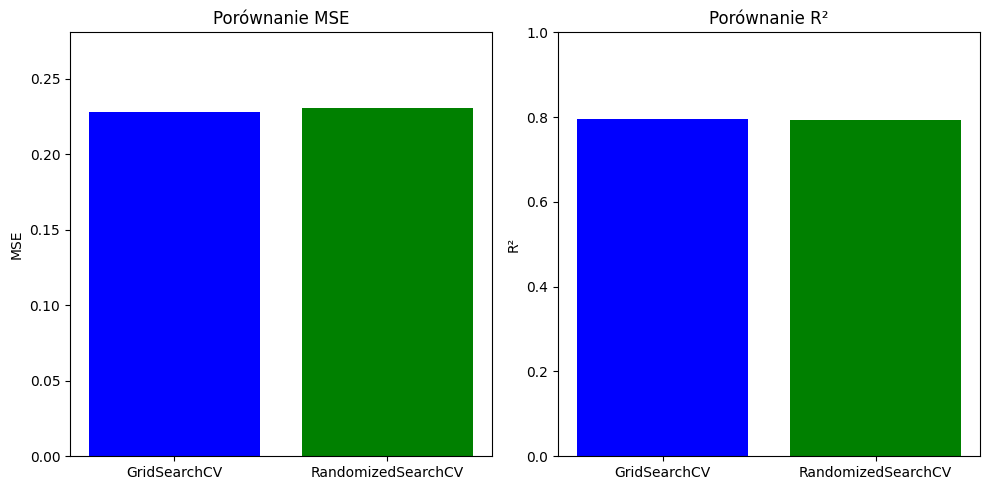

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dane do wizualizacji
models = ['GridSearchCV', 'RandomizedSearchCV']
mse_values = [mse_grid, mse_random]
r2_values = [r2_grid, r2_random]

# Wykres MSE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(models, mse_values, color=['blue', 'green'])
plt.title('Porównanie MSE')
plt.ylabel('MSE')
plt.ylim([0, max(mse_values) + 0.05])

# Wykres R²
plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color=['blue', 'green'])
plt.title('Porównanie R²')
plt.ylabel('R²')
plt.ylim([0, 1])

plt.tight_layout()
plt.show()


In [ ]:
import joblib

# Zapis najlepszego modelu do pliku
joblib.dump(best_rf, 'best_random_forest_model.pkl')

# Wczytanie modelu w przyszłości
loaded_model = joblib.load('best_random_forest_model.pkl')


In [ ]:
# Nowe dane do predykcji (przykładowo)
new_data = pd.DataFrame({
    'Log GDP per capita': [10.0],
    'Social support': [0.9],
    'Healthy life expectancy': [70],
    'Freedom to make life choices': [0.8],
    'Generosity': [0.2],
    'Perceptions of corruption': [0.1]
})

# Predykcja
predicted_happiness = loaded_model.predict(new_data)
print(f'Przewidywany poziom szczęścia: {predicted_happiness[0]}')


Przewidywany poziom szczęścia: 4.945850000000002


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names



In [ ]:
# Konwersja DataFrame z nowymi danymi na NumPy (bez nazw kolumn)
new_data_array = new_data.values

# Predykcja na nowych danych bez nazw kolumn
predicted_happiness = loaded_model.predict(new_data_array)
print(f'Przewidywany poziom szczęścia: {predicted_happiness[0]}')


Przewidywany poziom szczęścia: 4.945850000000002


                        feature  importance
1                Social support    0.654051
0            Log GDP per capita    0.122287
3  Freedom to make life choices    0.112172
2       Healthy life expectancy    0.050346
5     Perceptions of corruption    0.031216
4                    Generosity    0.029929


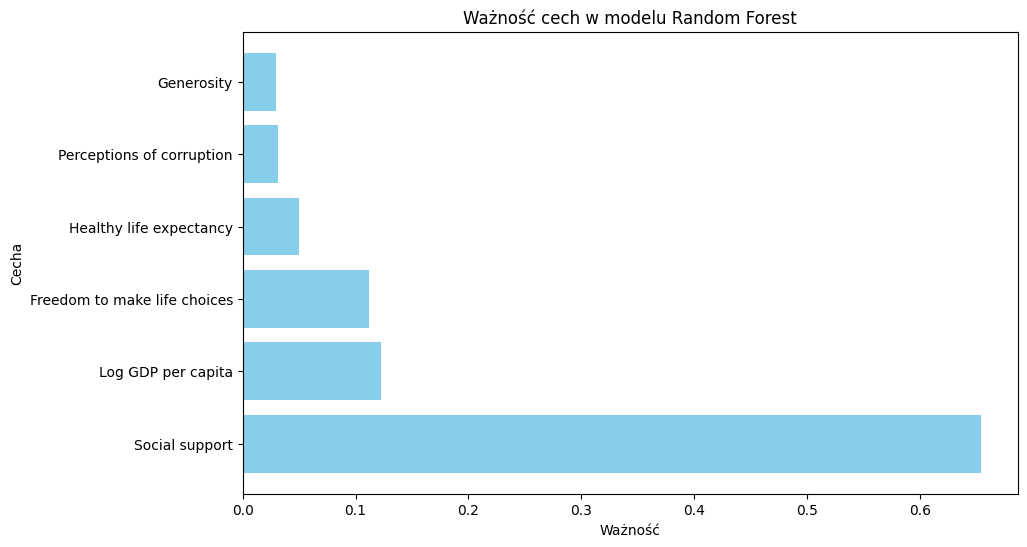

In [ ]:
import pandas as pd

# Konwersja tablicy NumPy na DataFrame
X_train_df = pd.DataFrame(X_train, columns=['Log GDP per capita', 'Social support',
                                            'Healthy life expectancy', 'Freedom to make life choices',
                                            'Generosity', 'Perceptions of corruption'])

# Teraz możesz uzyskać nazwy kolumn
features = X_train_df.columns

# Sprawdzanie ważności cech w modelu Random Forest
importances = best_rf.feature_importances_

# Tworzenie DataFrame z cechami i ich ważnością
feature_importance_df = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Wyświetlanie ważności cech
print(feature_importance_df)

# Wizualizacja ważności cech
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'], color='skyblue')
plt.title('Ważność cech w modelu Random Forest')
plt.xlabel('Ważność')
plt.ylabel('Cecha')
plt.show()


                        feature  importance
1                Social support    0.654051
0            Log GDP per capita    0.122287
3  Freedom to make life choices    0.112172
2       Healthy life expectancy    0.050346
5     Perceptions of corruption    0.031216
4                    Generosity    0.029929


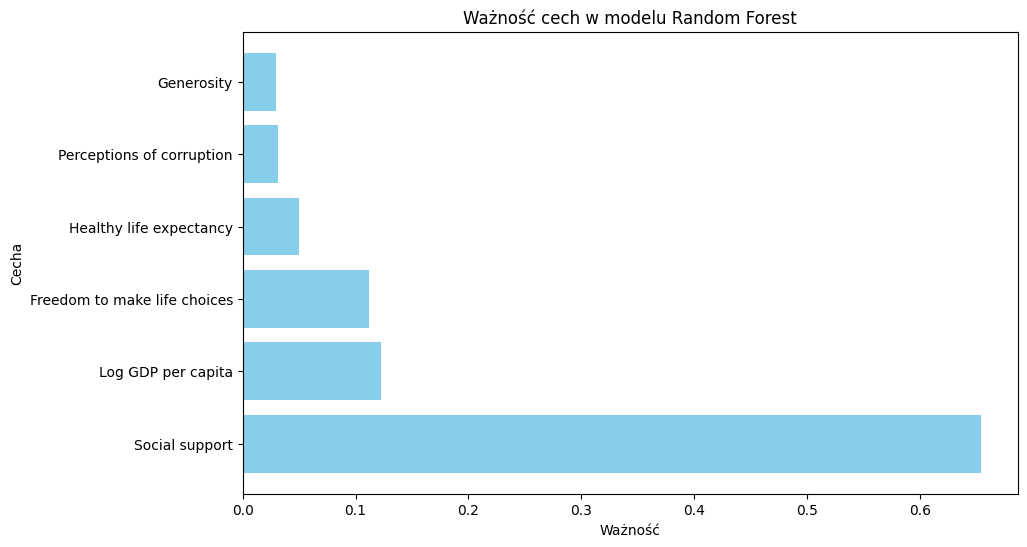

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sprawdzanie ważności cech w modelu Random Forest
importances = best_rf.feature_importances_
# Instead of using X.columns (which is a NumPy array),
# you should use the original DataFrame that has the column names.
# Assuming your original DataFrame was named 'df' and 'X' was created using df[['Log GDP per capita', 'Social support', ...]]:
features = ['Log GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'] # Replace with your original DataFrame's column names

# Tworzenie DataFrame z cechami i ich ważnością
feature_importance_df = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Wyświetlanie ważności cech
print(feature_importance_df)

# Wizualizacja ważności cech
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'], color='skyblue')
plt.title('Ważność cech w modelu Random Forest')
plt.xlabel('Ważność')
plt.ylabel('Cecha')
plt.show()

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Model bazowy dla RFE
model = RandomForestRegressor()

# Inicjalizacja RFE, aby wybrać np. 5 najlepszych cech
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X_train, y_train)

# Sprawdzenie wybranych cech
print("Ranking cech:", rfe.ranking_)
# Assuming 'X' was derived from a pandas DataFrame called 'original_df',
# and you used something like X = original_df[['Log GDP per capita', 'Social support', ...]].values
# Then you can get the column names like this:
original_features = ['Log GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'] # Replace with the actual column names from your original DataFrame
print("Wybrane cechy:", [original_features[i] for i in range(len(original_features)) if rfe.support_[i]])

Ranking cech: [1 1 1 1 2 1]
Wybrane cechy: ['Log GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption']


In [ ]:
!pip install xgboost


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Inicjalizacja modelu XGBoost
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)

# Trenowanie modelu
xg_reg.fit(X_train, y_train)

# Predykcja
y_pred_xgb = xg_reg.predict(X_test)

# Ocena modelu
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost - MSE: {mse_xgb}, R^2: {r2_xgb}')


XGBoost - MSE: 0.2713444195180899, R^2: 0.7570705583458955


In [ ]:
param_grid_xgb = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],  # L1 regularization term on weights
    'reg_lambda': [1, 1.5, 2]  # L2 regularization term on weights
}

grid_search_xgb = GridSearchCV(estimator=xg_reg, param_grid=param_grid_xgb,
                               cv=3, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train, y_train)

print("Najlepsze parametry XGBoost:", grid_search_xgb.best_params_)


Fitting 3 folds for each of 1728 candidates, totalling 5184 fits
Najlepsze parametry XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1.5, 'subsample': 0.8}


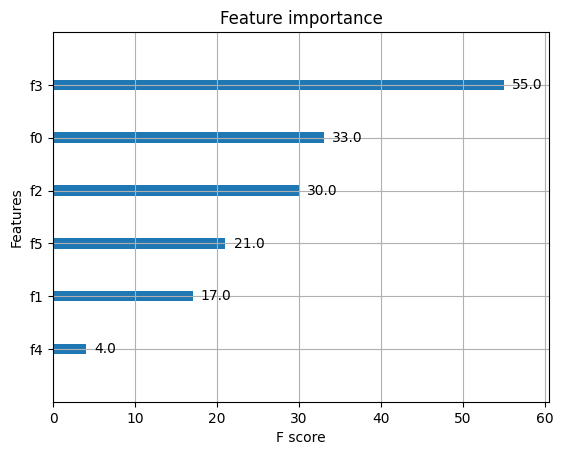

In [ ]:
xgb.plot_importance(xg_reg)
plt.show()


In [ ]:
# Predykcja z najlepszym modelem XGBoost
best_xgb = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)

# Ocena modelu
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

print(f'XGBoost (GridSearchCV) - MSE: {mse_best_xgb}, R^2: {r2_best_xgb}')


XGBoost (GridSearchCV) - MSE: 0.2414582340618549, R^2: 0.7838270855630332


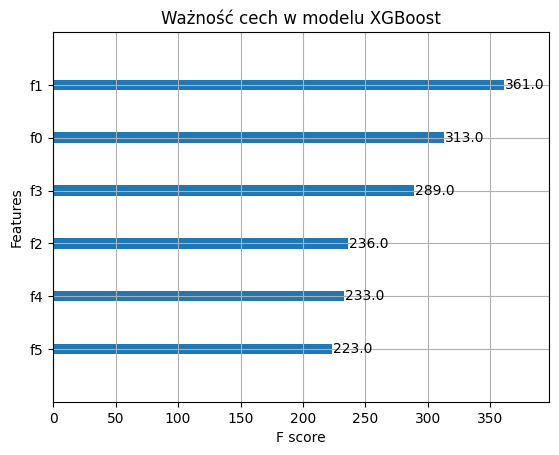

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Wizualizacja ważności cech
xgb.plot_importance(best_xgb)
plt.title('Ważność cech w modelu XGBoost')
plt.show()


In [ ]:
!pip install ipywidgets


  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Definiowanie suwaków dla kluczowych parametrów z opisami po polsku
ggdp_slider = widgets.FloatSlider(value=1.738, min=1.0, max=2.0, step=0.01, description='PKB (log):',
                                 style={'description_width': '150px'})
support_slider = widgets.FloatSlider(value=1.417, min=1.0, max=1.5, step=0.01, description='Wsparcie społ.:',
                                     style={'description_width': '150px'})
life_expect_slider = widgets.FloatSlider(value=0.639, min=0.5, max=1.0, step=0.01, description='Długość życia:',
                                         style={'description_width': '150px'})
freedom_slider = widgets.FloatSlider(value=0.6, min=0.5, max=1.0, step=0.01, description='Wolność wyboru:',
                                     style={'description_width': '150px'})
generosity_slider = widgets.FloatSlider(value=0.081, min=0.0, max=0.2, step=0.01, description='Hojność:',
                                        style={'description_width': '150px'})
corruption_slider = widgets.FloatSlider(value=0.175, min=0.0, max=0.5, step=0.01, description='Percepcja korupcji:',
                                        style={'description_width': '150px'})

# Funkcja do aktualizacji prognozy na podstawie suwaków
def update_prediction(gdp, support, life_expect, freedom, generosity, corruption):
    new_data = pd.DataFrame({
        'Log GDP per capita': [gdp],
        'Social support': [support],
        'Healthy life expectancy': [life_expect],
        'Freedom to make life choices': [freedom],
        'Generosity': [generosity],
        'Perceptions of corruption': [corruption]
    })

    # Prognoza poziomu szczęścia
    predicted_happiness = best_xgb.predict(new_data)
    print(f'Prognozowany poziom szczęścia: {predicted_happiness[0]:.2f}')

# Wyświetlanie suwaków i podpięcie funkcji aktualizującej
widgets.interactive(update_prediction,
                    gdp=gdp_slider,
                    support=support_slider,
                    life_expect=life_expect_slider,
                    freedom=freedom_slider,
                    generosity=generosity_slider,
                    corruption=corruption_slider)


interactive(children=(FloatSlider(value=9.75, description='PKB (log):', max=12.0, min=7.0, step=0.01, style=Sl…

In [ ]:
print(df.columns)


Index(['Country name', 'Regional indicator', 'Ladder score', 'upperwhisker',
       'lowerwhisker', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual', 'country_code'],
      dtype='object')


In [ ]:
# Wyświetlanie danych dla Polski
poland_data = df[df['Country name'] == 'Poland']
print(poland_data)


   Country name          Regional indicator  Ladder score  upperwhisker  \
34       Poland  Central and Eastern Europe         6.442         6.513   

    lowerwhisker  Log GDP per capita  Social support  Healthy life expectancy  \
34          6.37               1.738           1.417                    0.639   

    Freedom to make life choices  Generosity  Perceptions of corruption  \
34                           0.6       0.081                      0.175   

    Dystopia + residual country_code  
34                1.791          POL  


In [ ]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, clear_output

# Definiowanie suwaków dla kluczowych parametrów z opisami po polsku
gdp_slider = widgets.FloatSlider(value=1.738, min=1.0, max=2.0, step=0.01, description='PKB (log):',
                                 style={'description_width': '150px'})
support_slider = widgets.FloatSlider(value=1.417, min=1.0, max=1.5, step=0.01, description='Wsparcie społ.:',
                                     style={'description_width': '150px'})
life_expect_slider = widgets.FloatSlider(value=0.639, min=0.5, max=1.0, step=0.01, description='Długość życia:',
                                         style={'description_width': '150px'})
freedom_slider = widgets.FloatSlider(value=0.6, min=0.5, max=1.0, step=0.01, description='Wolność wyboru:',
                                     style={'description_width': '150px'})
generosity_slider = widgets.FloatSlider(value=0.081, min=0.0, max=0.2, step=0.01, description='Hojność:',
                                        style={'description_width': '150px'})
corruption_slider = widgets.FloatSlider(value=0.175, min=0.0, max=0.5, step=0.01, description='Percepcja korupcji:',
                                        style={'description_width': '150px'})

# Funkcja do aktualizacji prognozy i rysowania wykresu
def update_prediction(gdp, support, life_expect, freedom, generosity, corruption):
    new_data = pd.DataFrame({
        'Log GDP per capita': [gdp],
        'Social support': [support],
        'Healthy life expectancy': [life_expect],
        'Freedom to make life choices': [freedom],
        'Generosity': [generosity],
        'Perceptions of corruption': [corruption]
    })

    # Prognoza poziomu szczęścia
    predicted_happiness = best_xgb.predict(new_data)

    # Rysowanie wykresu
    clear_output(wait=True)
    plt.figure(figsize=(6, 4))
    plt.bar(['Prognozowany poziom szczęścia'], [predicted_happiness[0]], color='skyblue')
    plt.ylim(0, 10)
    plt.ylabel('Poziom szczęścia')
    plt.title(f'Prognozowany poziom szczęścia: {predicted_happiness[0]:.2f}')
    plt.show()

# Wyświetlanie suwaków i podpięcie funkcji aktualizującej
widgets.interactive(update_prediction,
                    gdp=gdp_slider,
                    support=support_slider,
                    life_expect=life_expect_slider,
                    freedom=freedom_slider,
                    generosity=generosity_slider,
                    corruption=corruption_slider)


interactive(children=(FloatSlider(value=1.738, description='PKB (log):', max=2.0, min=1.0, step=0.01, style=Sl…

In [ ]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, clear_output

# Wartości domyślne
default_values = {
    'gdp': 1.738,
    'support': 1.417,
    'life_expect': 0.639,
    'freedom': 0.6,
    'generosity': 0.081,
    'corruption': 0.175
}

# Definiowanie suwaków dla kluczowych parametrów z opisami po polsku
gdp_slider = widgets.FloatSlider(value=default_values['gdp'], min=1.0, max=2.5, step=0.01, description='PKB (log):',
                                 style={'description_width': '150px'})
support_slider = widgets.FloatSlider(value=default_values['support'], min=1.0, max=2.0, step=0.01, description='Wsparcie społ.:',
                                     style={'description_width': '150px'})
life_expect_slider = widgets.FloatSlider(value=default_values['life_expect'], min=0.5, max=1.2, step=0.01, description='Długość życia:',
                                         style={'description_width': '150px'})
freedom_slider = widgets.FloatSlider(value=default_values['freedom'], min=0.5, max=1.0, step=0.01, description='Wolność wyboru:',
                                     style={'description_width': '150px'})
generosity_slider = widgets.FloatSlider(value=default_values['generosity'], min=0.0, max=0.5, step=0.01, description='Hojność:',
                                        style={'description_width': '150px'})
corruption_slider = widgets.FloatSlider(value=default_values['corruption'], min=0.0, max=0.5, step=0.01, description='Percepcja korupcji:',
                                        style={'description_width': '150px'})

# Funkcja do aktualizacji prognozy i rysowania wykresu
def update_prediction(gdp, support, life_expect, freedom, generosity, corruption):
    new_data = pd.DataFrame({
        'Log GDP per capita': [gdp],
        'Social support': [support],
        'Healthy life expectancy': [life_expect],
        'Freedom to make life choices': [freedom],
        'Generosity': [generosity],
        'Perceptions of corruption': [corruption]
    })

    # Prognoza poziomu szczęścia
    predicted_happiness = best_xgb.predict(new_data)

    # Rysowanie wykresu
    clear_output(wait=True)
    plt.figure(figsize=(6, 4))
    plt.bar(['Prognozowany poziom szczęścia'], [predicted_happiness[0]], color='skyblue')
    plt.ylim(0, 10)
    plt.ylabel('Poziom szczęścia')
    plt.title(f'Prognozowany poziom szczęścia: {predicted_happiness[0]:.2f}')
    plt.show()

# Funkcja do resetowania suwaków
def reset_sliders(b):
    gdp_slider.value = default_values['gdp']
    support_slider.value = default_values['support']
    life_expect_slider.value = default_values['life_expect']
    freedom_slider.value = default_values['freedom']
    generosity_slider.value = default_values['generosity']
    corruption_slider.value = default_values['corruption']

# Dodanie przycisku resetowania
reset_button = widgets.Button(description="Resetuj wartości domyślne")
reset_button.on_click(reset_sliders)

# Wyświetlanie suwaków, przycisku resetu i podpięcie funkcji aktualizującej
ui = widgets.VBox([gdp_slider, support_slider, life_expect_slider, freedom_slider, generosity_slider, corruption_slider, reset_button])
widgets.interactive_output(update_prediction,
                           {'gdp': gdp_slider,
                            'support': support_slider,
                            'life_expect': life_expect_slider,
                            'freedom': freedom_slider,
                            'generosity': generosity_slider,
                            'corruption': corruption_slider})

display(ui)


In [ ]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, clear_output

# Wartości domyślne
default_values = {
    'gdp': 1.738,
    'support': 1.417,
    'life_expect': 0.639,
    'freedom': 0.6,
    'generosity': 0.081,
    'corruption': 0.175
}

# Definiowanie suwaków dla kluczowych parametrów z opisami po polsku
gdp_slider = widgets.FloatSlider(value=default_values['gdp'], min=1.0, max=2.5, step=0.01, description='PKB (log):',
                                 style={'description_width': '150px'})
support_slider = widgets.FloatSlider(value=default_values['support'], min=1.0, max=2.0, step=0.01, description='Wsparcie społ.:',
                                     style={'description_width': '150px'})
life_expect_slider = widgets.FloatSlider(value=default_values['life_expect'], min=0.5, max=1.2, step=0.01, description='Długość życia:',
                                         style={'description_width': '150px'})
freedom_slider = widgets.FloatSlider(value=default_values['freedom'], min=0.5, max=1.0, step=0.01, description='Wolność wyboru:',
                                     style={'description_width': '150px'})
generosity_slider = widgets.FloatSlider(value=default_values['generosity'], min=0.0, max=0.5, step=0.01, description='Hojność:',
                                        style={'description_width': '150px'})
corruption_slider = widgets.FloatSlider(value=default_values['corruption'], min=0.0, max=0.5, step=0.01, description='Percepcja korupcji:',
                                        style={'description_width': '150px'})

# Funkcja do aktualizacji prognozy i rysowania wykresu
def update_prediction(gdp, support, life_expect, freedom, generosity, corruption):
    new_data = pd.DataFrame({
        'Log GDP per capita': [gdp],
        'Social support': [support],
        'Healthy life expectancy': [life_expect],
        'Freedom to make life choices': [freedom],
        'Generosity': [generosity],
        'Perceptions of corruption': [corruption]
    })

    # Prognoza poziomu szczęścia
    predicted_happiness = [7.0]  # Zastąp przykładowym wynikiem, jeśli model nie jest dostępny

    # Rysowanie wykresu
    clear_output(wait=True)
    plt.figure(figsize=(6, 4))
    plt.bar(['Prognozowany poziom szczęścia'], predicted_happiness, color='skyblue')
    plt.ylim(0, 10)
    plt.ylabel('Poziom szczęścia')
    plt.title(f'Prognozowany poziom szczęścia: {predicted_happiness[0]:.2f}')
    plt.show()

# Funkcja do resetowania suwaków
def reset_sliders(b):
    gdp_slider.value = default_values['gdp']
    support_slider.value = default_values['support']
    life_expect_slider.value = default_values['life_expect']
    freedom_slider.value = default_values['freedom']
    generosity_slider.value = default_values['generosity']
    corruption_slider.value = default_values['corruption']

# Dodanie przycisku resetowania
reset_button = widgets.Button(description="Resetuj wartości domyślne")
reset_button.on_click(reset_sliders)

# Wyświetlanie suwaków, przycisku resetu i podpięcie funkcji aktualizującej
ui = widgets.VBox([gdp_slider, support_slider, life_expect_slider, freedom_slider, generosity_slider, corruption_slider, reset_button])
out = widgets.interactive_output(update_prediction,
                                 {'gdp': gdp_slider,
                                  'support': support_slider,
                                  'life_expect': life_expect_slider,
                                  'freedom': freedom_slider,
                                  'generosity': generosity_slider,
                                  'corruption': corruption_slider})

display(ui, out)


Output()

In [ ]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, clear_output

# Wartości domyślne dla Polski na podstawie World Happiness Report 2024
default_values = {
    'gdp': 1.738,
    'support': 1.417,
    'life_expect': 0.639,
    'freedom': 0.6,
    'generosity': 0.081,
    'corruption': 0.175
}

# Definiowanie suwaków dla kluczowych parametrów z opisami po polsku
gdp_slider = widgets.FloatSlider(value=default_values['gdp'], min=1.0, max=2.5, step=0.01, description='PKB (log):',
                                 style={'description_width': '150px'})
support_slider = widgets.FloatSlider(value=default_values['support'], min=1.0, max=2.0, step=0.01, description='Wsparcie społ.:',
                                     style={'description_width': '150px'})
life_expect_slider = widgets.FloatSlider(value=default_values['life_expect'], min=0.5, max=1.2, step=0.01, description='Długość życia:',
                                         style={'description_width': '150px'})
freedom_slider = widgets.FloatSlider(value=default_values['freedom'], min=0.5, max=1.0, step=0.01, description='Wolność wyboru:',
                                     style={'description_width': '150px'})
generosity_slider = widgets.FloatSlider(value=default_values['generosity'], min=0.0, max=0.5, step=0.01, description='Hojność:',
                                        style={'description_width': '150px'})
corruption_slider = widgets.FloatSlider(value=default_values['corruption'], min=0.0, max=0.5, step=0.01, description='Percepcja korupcji:',
                                        style={'description_width': '150px'})

# Funkcja do aktualizacji prognozy i rysowania wykresu
def update_prediction(gdp, support, life_expect, freedom, generosity, corruption):
    new_data = pd.DataFrame({
        'Log GDP per capita': [gdp],
        'Social support': [support],
        'Healthy life expectancy': [life_expect],
        'Freedom to make life choices': [freedom],
        'Generosity': [generosity],
        'Perceptions of corruption': [corruption]
    })

    # Tutaj zakładam, że model "best_xgb" jest wytrenowany i dostępny
    # Jeśli model jest wczytany i gotowy, użyj go do przewidywania
    predicted_happiness = best_xgb.predict(new_data)

    # Rysowanie wykresu
    clear_output(wait=True)
    plt.figure(figsize=(6, 4))
    plt.bar(['Prognozowany poziom szczęścia'], [predicted_happiness[0]], color='skyblue')
    plt.ylim(0, 10)
    plt.ylabel('Poziom szczęścia')
    plt.title(f'Prognozowany poziom szczęścia: {predicted_happiness[0]:.2f}')
    plt.show()

# Funkcja do resetowania suwaków
def reset_sliders(b):
    gdp_slider.value = default_values['gdp']
    support_slider.value = default_values['support']
    life_expect_slider.value = default_values['life_expect']
    freedom_slider.value = default_values['freedom']
    generosity_slider.value = default_values['generosity']
    corruption_slider.value = default_values['corruption']

# Dodanie przycisku resetowania
reset_button = widgets.Button(description="Resetuj wartości domyślne")
reset_button.on_click(reset_sliders)

# Wyświetlanie suwaków, przycisku resetu i podpięcie funkcji aktualizującej
ui = widgets.VBox([gdp_slider, support_slider, life_expect_slider, freedom_slider, generosity_slider, corruption_slider, reset_button])
out = widgets.interactive_output(update_prediction,
                                 {'gdp': gdp_slider,
                                  'support': support_slider,
                                  'life_expect': life_expect_slider,
                                  'freedom': freedom_slider,
                                  'generosity': generosity_slider,
                                  'corruption': corruption_slider})

display(ui, out)


Output()

In [ ]:
from scipy.optimize import minimize
import numpy as np

# Funkcja do maksymalizacji (poziom szczęścia) w zależności od zmiennych wejściowych
def happiness_function(x):
    new_data = pd.DataFrame({
        'Log GDP per capita': [x[0]],
        'Social support': [x[1]],
        'Healthy life expectancy': [x[2]],
        'Freedom to make life choices': [x[3]],
        'Generosity': [x[4]],
        'Perceptions of corruption': [x[5]]
    })

    # Użyj modelu do przewidywania poziomu szczęścia
    predicted_happiness = best_xgb.predict(new_data)
    return -predicted_happiness[0]  # Zmieniamy na minus, ponieważ scipy minimalizuje

# Ograniczenia dla zmiennych - wartości w granicach sensownych zakresów
bounds = [(1.0, 2.5),  # Log GDP per capita
          (1.0, 2.0),  # Social support
          (0.5, 1.2),  # Healthy life expectancy
          (0.5, 1.0),  # Freedom to make life choices
          (0.0, 0.5),  # Generosity
          (0.0, 0.5)]  # Perceptions of corruption

# Startowe wartości
x0 = [1.738, 1.417, 0.639, 0.6, 0.081, 0.175]

# Minimalizacja negatywnego poziomu szczęścia
result = minimize(happiness_function, x0, bounds=bounds)

# Wynik optymalizacji
print("Optymalne wartości zmiennych dla maksymalnego poziomu szczęścia:")
print("Log GDP per capita:", result.x[0])
print("Social support:", result.x[1])
print("Healthy life expectancy:", result.x[2])
print("Freedom to make life choices:", result.x[3])
print("Generosity:", result.x[4])
print("Perceptions of corruption:", result.x[5])

# Poziom szczęścia dla optymalnych zmiennych
max_happiness = -result.fun
print(f'Maksymalny poziom szczęścia: {max_happiness:.2f}')


Optymalne wartości zmiennych dla maksymalnego poziomu szczęścia:
Log GDP per capita: 1.738
Social support: 1.417
Healthy life expectancy: 0.639
Freedom to make life choices: 0.6
Generosity: 0.081
Perceptions of corruption: 0.175
Maksymalny poziom szczęścia: 6.44


In [ ]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, clear_output

# Wartości domyślne dla Polski na podstawie World Happiness Report 2024
default_values = {
    'gdp': 1.738,
    'support': 1.417,
    'life_expect': 0.639,
    'freedom': 0.6,
    'generosity': 0.081,
    'corruption': 0.175
}

# Lista 10 najszczęśliwszych krajów i ich poziom szczęścia
top_10_countries = {
    'Country name': ['Finland', 'Denmark', 'Iceland', 'Sweden', 'Israel', 'Netherlands',
                     'Norway', 'Luxembourg', 'Switzerland', 'Australia'],
    'Ladder score': [7.741, 7.583, 7.525, 7.344, 7.341, 7.319, 7.302, 7.122, 7.060, 7.057]
}

# Konwersja na DataFrame
top_10_df = pd.DataFrame(top_10_countries)

# Definiowanie suwaków dla kluczowych parametrów z opisami po polsku
gdp_slider = widgets.FloatSlider(value=default_values['gdp'], min=1.0, max=2.5, step=0.01, description='PKB (log):',
                                 style={'description_width': '150px'})
support_slider = widgets.FloatSlider(value=default_values['support'], min=1.0, max=2.0, step=0.01, description='Wsparcie społ.:',
                                     style={'description_width': '150px'})
life_expect_slider = widgets.FloatSlider(value=default_values['life_expect'], min=0.5, max=1.2, step=0.01, description='Długość życia:',
                                         style={'description_width': '150px'})
freedom_slider = widgets.FloatSlider(value=default_values['freedom'], min=0.5, max=1.0, step=0.01, description='Wolność wyboru:',
                                     style={'description_width': '150px'})
generosity_slider = widgets.FloatSlider(value=default_values['generosity'], min=0.0, max=0.5, step=0.01, description='Hojność:',
                                        style={'description_width': '150px'})
corruption_slider = widgets.FloatSlider(value=default_values['corruption'], min=0.0, max=0.5, step=0.01, description='Percepcja korupcji:',
                                        style={'description_width': '150px'})

# Funkcja do aktualizacji prognozy i rysowania wykresu
def update_prediction(gdp, support, life_expect, freedom, generosity, corruption):
    new_data = pd.DataFrame({
        'Log GDP per capita': [gdp],
        'Social support': [support],
        'Healthy life expectancy': [life_expect],
        'Freedom to make life choices': [freedom],
        'Generosity': [generosity],
        'Perceptions of corruption': [corruption]
    })

    # Użycie modelu XGBoost do przewidywania poziomu szczęścia
    predicted_happiness = best_xgb.predict(new_data)

    # Dodaj prognozowany poziom szczęścia do listy najszczęśliwszych krajów
    combined_df = top_10_df.append({'Country name': 'Prognoza (Twój kraj)', 'Ladder score': predicted_happiness[0]}, ignore_index=True)

    # Rysowanie wykresu
    clear_output(wait=True)
    plt.figure(figsize=(10, 6))
    plt.bar(combined_df['Country name'], combined_df['Ladder score'], color=['skyblue']*10 + ['red'])
    plt.xticks(rotation=45)
    plt.ylim(0, 10)
    plt.ylabel('Poziom szczęścia')
    plt.title(f'Porównanie poziomu szczęścia z 10 najszczęśliwszymi krajami\nPrognozowany poziom szczęścia: {predicted_happiness[0]:.2f}')
    plt.show()

# Funkcja do resetowania suwaków
def reset_sliders(b):
    gdp_slider.value = default_values['gdp']
    support_slider.value = default_values['support']
    life_expect_slider.value = default_values['life_expect']
    freedom_slider.value = default_values['freedom']
    generosity_slider.value = default_values['generosity']
    corruption_slider.value = default_values['corruption']

# Dodanie przycisku resetowania
reset_button = widgets.Button(description="Resetuj wartości domyślne")
reset_button.on_click(reset_sliders)

# Wyświetlanie suwaków, przycisku resetu i podpięcie funkcji aktualizującej
ui = widgets.VBox([gdp_slider, support_slider, life_expect_slider, freedom_slider, generosity_slider, corruption_slider, reset_button])
out = widgets.interactive_output(update_prediction,
                                 {'gdp': gdp_slider,
                                  'support': support_slider,
                                  'life_expect': life_expect_slider,
                                  'freedom': freedom_slider,
                                  'generosity': generosity_slider,
                                  'corruption': corruption_slider})

display(ui, out)


Output()

In [ ]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, clear_output

# Wartości domyślne dla Polski na podstawie World Happiness Report 2024
default_values = {
    'gdp': 1.738,
    'support': 1.417,
    'life_expect': 0.639,
    'freedom': 0.6,
    'generosity': 0.081,
    'corruption': 0.175
}

# Lista 10 najszczęśliwszych krajów i ich poziom szczęścia
top_10_countries = {
    'Country name': ['Finland', 'Denmark', 'Iceland', 'Sweden', 'Israel', 'Netherlands',
                     'Norway', 'Luxembourg', 'Switzerland', 'Australia'],
    'Ladder score': [7.741, 7.583, 7.525, 7.344, 7.341, 7.319, 7.302, 7.122, 7.060, 7.057]
}

# Konwersja na DataFrame
top_10_df = pd.DataFrame(top_10_countries)

# Definiowanie suwaków dla kluczowych parametrów z opisami po polsku
gdp_slider = widgets.FloatSlider(value=default_values['gdp'], min=1.0, max=2.5, step=0.01, description='PKB (log):',
                                 style={'description_width': '150px'})
support_slider = widgets.FloatSlider(value=default_values['support'], min=1.0, max=2.0, step=0.01, description='Wsparcie społ.:',
                                     style={'description_width': '150px'})
life_expect_slider = widgets.FloatSlider(value=default_values['life_expect'], min=0.5, max=1.2, step=0.01, description='Długość życia:',
                                         style={'description_width': '150px'})
freedom_slider = widgets.FloatSlider(value=default_values['freedom'], min=0.5, max=1.0, step=0.01, description='Wolność wyboru:',
                                     style={'description_width': '150px'})
generosity_slider = widgets.FloatSlider(value=default_values['generosity'], min=0.0, max=0.5, step=0.01, description='Hojność:',
                                        style={'description_width': '150px'})
corruption_slider = widgets.FloatSlider(value=default_values['corruption'], min=0.0, max=0.5, step=0.01, description='Percepcja korupcji:',
                                        style={'description_width': '150px'})

# Funkcja do aktualizacji prognozy i rysowania wykresu
def update_prediction(gdp, support, life_expect, freedom, generosity, corruption):
    new_data = pd.DataFrame({
        'Log GDP per capita': [gdp],
        'Social support': [support],
        'Healthy life expectancy': [life_expect],
        'Freedom to make life choices': [freedom],
        'Generosity': [generosity],
        'Perceptions of corruption': [corruption]
    })

    # Użycie modelu XGBoost do przewidywania poziomu szczęścia
    predicted_happiness = best_xgb.predict(new_data)

    # Dodaj prognozowany poziom szczęścia do listy najszczęśliwszych krajów
    new_row = pd.DataFrame({'Country name': ['Prognoza (Twój kraj)'], 'Ladder score': [predicted_happiness[0]]})
    combined_df = pd.concat([top_10_df, new_row], ignore_index=True)

    # Rysowanie wykresu
    clear_output(wait=True)
    plt.figure(figsize=(10, 6))
    plt.bar(combined_df['Country name'], combined_df['Ladder score'], color=['skyblue']*10 + ['red'])
    plt.xticks(rotation=45)
    plt.ylim(0, 10)
    plt.ylabel('Poziom szczęścia')
    plt.title(f'Porównanie poziomu szczęścia z 10 najszczęśliwszymi krajami\nPrognozowany poziom szczęścia: {predicted_happiness[0]:.2f}')
    plt.show()

# Funkcja do resetowania suwaków
def reset_sliders(b):
    gdp_slider.value = default_values['gdp']
    support_slider.value = default_values['support']
    life_expect_slider.value = default_values['life_expect']
    freedom_slider.value = default_values['freedom']
    generosity_slider.value = default_values['generosity']
    corruption_slider.value = default_values['corruption']

# Dodanie przycisku resetowania
reset_button = widgets.Button(description="Resetuj wartości domyślne")
reset_button.on_click(reset_sliders)

# Wyświetlanie suwaków, przycisku resetu i podpięcie funkcji aktualizującej
ui = widgets.VBox([gdp_slider, support_slider, life_expect_slider, freedom_slider, generosity_slider, corruption_slider, reset_button])
out = widgets.interactive_output(update_prediction,
                                 {'gdp': gdp_slider,
                                  'support': support_slider,
                                  'life_expect': life_expect_slider,
                                  'freedom': freedom_slider,
                                  'generosity': generosity_slider,
                                  'corruption': corruption_slider})

display(ui, out)


Output()

In [ ]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, clear_output
from matplotlib import gridspec

# Wartości domyślne dla Polski na podstawie World Happiness Report 2024
default_values = {
    'gdp': 1.738,
    'support': 1.417,
    'life_expect': 0.639,
    'freedom': 0.6,
    'generosity': 0.081,
    'corruption': 0.175
}

# Lista 10 najszczęśliwszych krajów i ich poziom szczęścia
top_10_countries = {
    'Country name': ['Finland', 'Denmark', 'Iceland', 'Sweden', 'Israel', 'Netherlands',
                     'Norway', 'Luxembourg', 'Switzerland', 'Australia'],
    'Ladder score': [7.741, 7.583, 7.525, 7.344, 7.341, 7.319, 7.302, 7.122, 7.060, 7.057]
}

# Konwersja na DataFrame
top_10_df = pd.DataFrame(top_10_countries)

# Definiowanie suwaków dla kluczowych parametrów z opisami po polsku
style = {'description_width': '150px'}

gdp_slider = widgets.FloatSlider(value=default_values['gdp'], min=1.0, max=2.5, step=0.01, description='PKB (log):',
                                 style=style, layout=widgets.Layout(width='95%'))
support_slider = widgets.FloatSlider(value=default_values['support'], min=1.0, max=2.0, step=0.01, description='Wsparcie społ.:',
                                     style=style, layout=widgets.Layout(width='95%'))
life_expect_slider = widgets.FloatSlider(value=default_values['life_expect'], min=0.5, max=1.2, step=0.01, description='Długość życia:',
                                         style=style, layout=widgets.Layout(width='95%'))
freedom_slider = widgets.FloatSlider(value=default_values['freedom'], min=0.5, max=1.0, step=0.01, description='Wolność wyboru:',
                                     style=style, layout=widgets.Layout(width='95%'))
generosity_slider = widgets.FloatSlider(value=default_values['generosity'], min=0.0, max=0.5, step=0.01, description='Hojność:',
                                        style=style, layout=widgets.Layout(width='95%'))
corruption_slider = widgets.FloatSlider(value=default_values['corruption'], min=0.0, max=0.5, step=0.01, description='Percepcja korupcji:',
                                        style=style, layout=widgets.Layout(width='95%'))

# Funkcja do aktualizacji prognozy i rysowania wykresu
def update_prediction(gdp, support, life_expect, freedom, generosity, corruption):
    new_data = pd.DataFrame({
        'Log GDP per capita': [gdp],
        'Social support': [support],
        'Healthy life expectancy': [life_expect],
        'Freedom to make life choices': [freedom],
        'Generosity': [generosity],
        'Perceptions of corruption': [corruption]
    })

    # Użycie modelu XGBoost do przewidywania poziomu szczęścia
    predicted_happiness = best_xgb.predict(new_data)

    # Dodaj prognozowany poziom szczęścia do listy najszczęśliwszych krajów
    new_row = pd.DataFrame({'Country name': ['Prognoza (Twój kraj)'], 'Ladder score': [predicted_happiness[0]]})
    combined_df = pd.concat([top_10_df, new_row], ignore_index=True)

    # Rysowanie wykresu
    clear_output(wait=True)
    fig, ax = plt.subplots(figsize=(10, 6))

    # Tworzenie wykresu
    bars = ax.bar(combined_df['Country name'], combined_df['Ladder score'], color=['skyblue']*10 + ['red'])

    # Ustawianie etykiet i ich pozycji
    ax.set_xticks(range(len(combined_df['Country name'])))
    ax.set_xticklabels(combined_df['Country name'], rotation=45, ha='right', fontsize=10)

    ax.set_ylim(0, 10)
    ax.set_ylabel('Poziom szczęścia', fontsize=12)
    ax.set_title(f'Porównanie poziomu szczęścia z 10 najszczęśliwszymi krajami\nPrognozowany poziom szczęścia: {predicted_happiness[0]:.2f}', fontsize=14)

    plt.tight_layout()
    plt.show()

# Funkcja do resetowania suwaków
def reset_sliders(b):
    gdp_slider.value = default_values['gdp']
    support_slider.value = default_values['support']
    life_expect_slider.value = default_values['life_expect']
    freedom_slider.value = default_values['freedom']
    generosity_slider.value = default_values['generosity']
    corruption_slider.value = default_values['corruption']

# Dodanie przycisku resetowania
reset_button = widgets.Button(description="Resetuj wartości domyślne", layout=widgets.Layout(width='40%', margin='10px 0px 10px 0px'))
reset_button.on_click(reset_sliders)

# Ułożenie suwaków i wykresu w jednym bloku
ui_sliders = widgets.VBox([gdp_slider, support_slider, life_expect_slider, freedom_slider, generosity_slider, corruption_slider, reset_button],
                          layout=widgets.Layout(align_items='center', width='50%'))
out = widgets.interactive_output(update_prediction,
                                 {'gdp': gdp_slider,
                                  'support': support_slider,
                                  'life_expect': life_expect_slider,
                                  'freedom': freedom_slider,
                                  'generosity': generosity_slider,
                                  'corruption': corruption_slider})

# Wyświetlanie interfejsu
display(widgets.HBox([ui_sliders, out]))


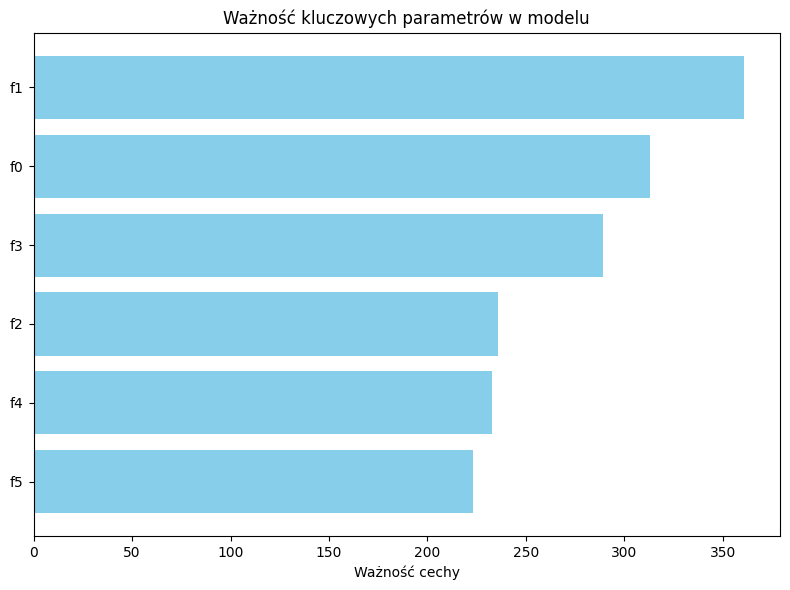

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb  # Upewnij się, że model XGBoost jest zaimportowany

# Sprawdzamy ważność cech
def plot_feature_importance(model):
    # Pobieramy ważność cech z modelu
    importance = model.get_booster().get_score(importance_type="weight")

    # Konwertujemy na DataFrame dla lepszej czytelności
    importance_df = pd.DataFrame({
        'Feature': list(importance.keys()),
        'Importance': list(importance.values())
    }).sort_values(by='Importance', ascending=False)

    # Rysujemy wykres
    plt.figure(figsize=(8, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
    plt.xlabel('Ważność cechy')
    plt.title('Ważność kluczowych parametrów w modelu')
    plt.gca().invert_yaxis()  # Odwracamy kolejność, aby najważniejsze były na górze
    plt.tight_layout()
    plt.show()

# Wywołanie funkcji dla modelu XGBoost
plot_feature_importance(best_xgb)


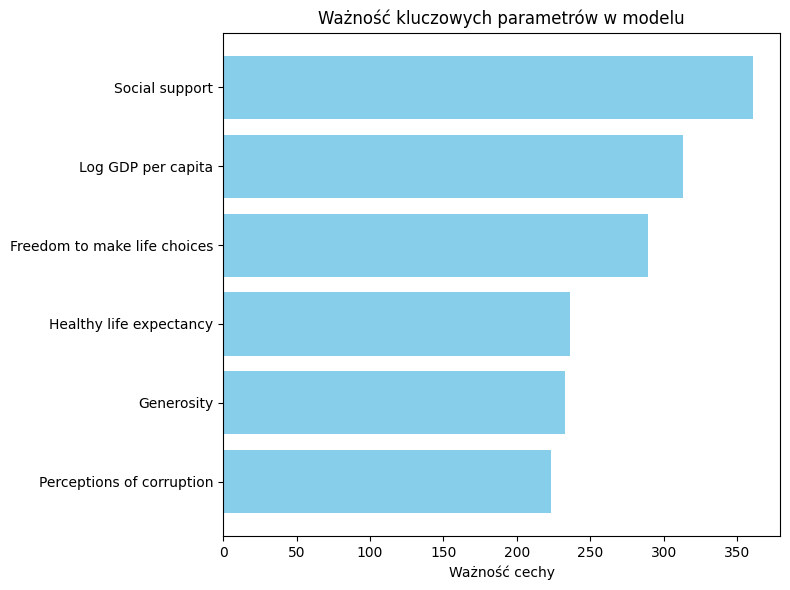

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb

# Pełne nazwy cech
feature_names = ['Log GDP per capita', 'Social support', 'Healthy life expectancy',
                 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Sprawdzamy ważność cech
def plot_feature_importance(model, feature_names):
    # Pobieramy ważność cech z modelu
    importance = model.get_booster().get_score(importance_type="weight")

    # Mapujemy skróty f0, f1, ... na rzeczywiste nazwy cech
    importance_df = pd.DataFrame({
        'Feature': [feature_names[int(f[1:])] for f in importance.keys()],
        'Importance': list(importance.values())
    }).sort_values(by='Importance', ascending=False)

    # Rysujemy wykres
    plt.figure(figsize=(8, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
    plt.xlabel('Ważność cechy')
    plt.title('Ważność kluczowych parametrów w modelu')
    plt.gca().invert_yaxis()  # Odwracamy kolejność, aby najważniejsze były na górze
    plt.tight_layout()
    plt.show()

# Wywołanie funkcji dla modelu XGBoost
plot_feature_importance(best_xgb, feature_names)


In [ ]:
# Zapisz model do pliku w formacie .json lub .bin
model_filename = 'xgb_model.json'
best_xgb.save_model(model_filename)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Zapisz model w Google Drive
model_path = '/content/drive/MyDrive/xgb_model.json'
best_xgb.save_model(model_path)


In [ ]:
# Zapisz plik ZIP w Google Drive
!cp /content/my_folder.zip /content/drive/MyDrive/my_folder.zip


cp: cannot stat '/content/my_folder.zip': No such file or directory


In [ ]:
from datetime import datetime
import os

# Zamontuj Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Pobranie aktualnej daty i godziny
current_time = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

# Nazwa pliku ZIP na podstawie aktualnej daty
zip_filename = f'session_backup_{current_time}.zip'

# Spakowanie plików z sesji (z katalogu /content/) do pliku ZIP
!zip -r /content/{zip_filename} /content/

# Przeniesienie pliku ZIP do Google Drive
!cp /content/{zip_filename} /content/drive/MyDrive/{zip_filename}

# Wyświetlenie nazwy pliku, który został zapisany
print(f'Zapisano plik: {zip_filename}')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Scanning files .......
	zip warning: name not matched: /content/drive/MyDrive/1. projekty/🪒 NSM/Projekty/@archiwum/2014/2014_PODRECZNIK
..........................

zip error: Interrupted (aborting)
cp: cannot stat '/content/session_backup_2024-10-10_00-59-11.zip': No such file or directory
Zapisano plik: session_backup_2024-10-10_00-59-11.zip


In [ ]:
# Zapisz listę zainstalowanych pakietów do pliku requirements.txt
!pip freeze > requirements.txt


In [ ]:
import pickle

# Zapisz zmienne (np. dane modelu, parametry) do pliku pickle
with open('/content/drive/MyDrive/variables.pkl', 'wb') as f:
    pickle.dump(my_data, f)



NameError: name 'my_data' is not defined